In [ ]:
from data_reader import get_data_arr
import keras
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import numpy as np
import os
from data_reader import get_data_stratify

In [9]:
%matplotlib inline  
import matplotlib.pyplot as plt
from time import gmtime, strftime

In [37]:
# import file containing models
from transfer_models import *
from utils import *

In [3]:
# office 12 objects
classes_reader = ["apple", "pen", "book", "monitor", "mouse", "wallet", "keyboard",
                  "banana", "key", "mug", "pear", "orange"]

Experiment augmentation from array image.

In [4]:
x_train, y_train, x_val, y_val, x_test, y_test = get_data_arr()

Read data from mydata_1200.npz 



In [13]:
# Simple model with resnet-(256, 0.5)
resnet_256 = get_model([(256, 0.5)])
resnet_256 = build_model(resnet_256)

initializer = he_normal and l2 regularizer reg = 0.010000
added fc-256 with dropout keep probability 0.500000


/home/hav16/vgg_transfer/transfer_models.py:83: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("se...)`
  model = keras.models.Model(input=base_model.input, output=fc_model(base_model.output))


In [ ]:
# let's do an experiment with 
history = resnet_256.fit(x_train, y_train, batch_size=48, epochs=2,
                   validation_data=(x_val, y_val),
                   verbose=1)
plot_history(history)

history = resnet_256.fit(x_train, y_train, batch_size=48, epochs=2,
                   validation_data=(x_val, y_val),
                   verbose=1)
plot_history(history)

Train on 8064 samples, validate on 2016 samples
Epoch 1/2
8064/8064 [==============================] - 92s - loss: 5.2242 - acc: 0.5339 - val_loss: 4.1471 - val_acc: 0.8180
Epoch 2/2
8064/8064 [==============================] - 91s - loss: 4.0587 - acc: 0.7582 - val_loss: 3.5786 - val_acc: 0.8447


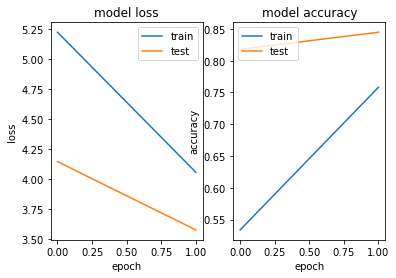

Train on 8064 samples, validate on 2016 samples
Epoch 1/2
8064/8064 [==============================] - 91s - loss: 3.5112 - acc: 0.8021 - val_loss: 3.1414 - val_acc: 0.8601
Epoch 2/2
8064/8064 [==============================] - 91s - loss: 3.0711 - acc: 0.8346 - val_loss: 2.7845 - val_acc: 0.8720


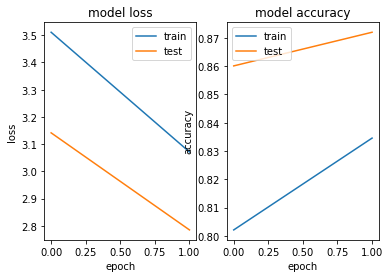

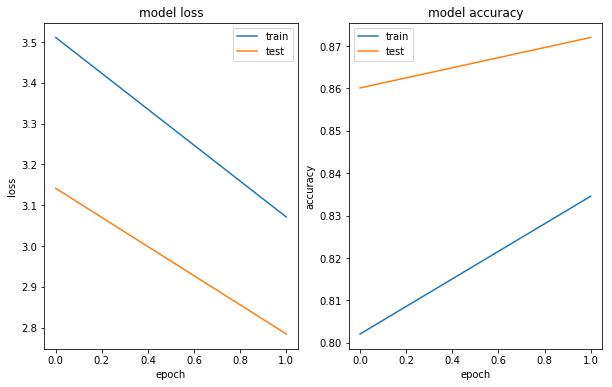

In [38]:
# import matplotlib
# matplotlib.rcParams['figure.figsize'] = (10, 6)
# fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
# plt.figure(figsize=(10, 6))
# Two subplots, the axes array is 1-d
plot_history(history)